<a href="https://colab.research.google.com/github/ksaijeevan/Artificial-Intelligence/blob/main/Movie_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

print("Movies Dataset:")
print(movies.head(), "\n")

Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   



In [ ]:
print("Ratings Dataset:")
print(ratings.head(), "\n")

Ratings Dataset:
   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523 



In [ ]:
print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)


Movies shape: (10329, 3)
Ratings shape: (105339, 4)


In [ ]:
print("Missing values in movies:\n",movies.isnull().sum())
print("Missing values in ratings:\n", ratings.isnull().sum())

Missing values in movies:
 movieId    0
title      0
genres     0
dtype: int64
Missing values in ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [ ]:
data = pd.merge(movies, ratings, on='movieId')
print("\n Merged Dataset Sample:")
print(data.head())


 Merged Dataset Sample:
   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0       2     5.0   859046895  
1       5     4.0  1303501039  
2       8     5.0   858610933  
3      11     4.0   850815810  
4      14     4.0   851766286  


In [ ]:
print("\n Unique Users and Movies")
print("\n Number of Unique Users:", data['userId'].nunique())
print("\n Number of Unique Movies:",data['movieId'].nunique())


 Unique Users and Movies

 Number of Unique Users: 668

 Number of Unique Movies: 10325


In [ ]:
print("\n Average Rating per Movie")
avg_rating = data.groupby('title')['rating'].mean().sort_values(ascending = False)
print("\n Top 5 Movies by Average Rating:")
print(avg_rating.head())


 Average Rating per Movie

 Top 5 Movies by Average Rating:
title
Ghost in the Shell: Stand Alone Complex - The Laughing Man (2005)    5.0
Speedy (1928)                                                        5.0
Cold Fever (Á köldum klaka) (1995)                                   5.0
Symbol (Shinboru) (2009)                                             5.0
Limelight (1952)                                                     5.0
Name: rating, dtype: float64


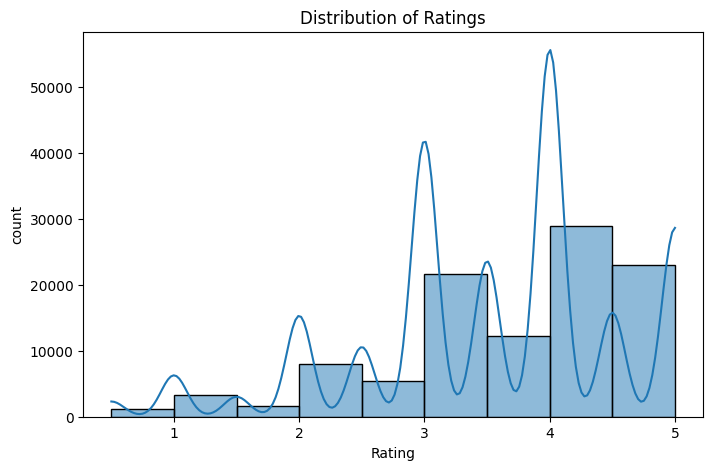

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['rating'], bins=9, kde = True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("count")
plt.show()

In [ ]:
def popularity_based_recommender(genre_input, min_reviews, top_n):
    movies_exploded = movies.copy()
    movies_exploded['genres'] = movies_exploded['genres'].str.split('|')
    movies_exploded = movies_exploded.explode('genres')

    genre_movies = movies_exploded[movies_exploded['genres'] == genre_input]

    merged = pd.merge(ratings, genre_movies, on='movieId')

    grouped = merged.groupby('title').agg({ 'rating': ['mean', 'count']}).reset_index()
    grouped.columns = ['title', 'avg_rating', 'num_reviews']


    filtered = grouped[grouped['num_reviews'] >= min_reviews]
    result = filtered.sort_values(by='avg_rating', ascending=False).head(top_n)
    return result.reset_index(drop=True)

genre = input("Enter Genre: ")
min_reviews = int(input("Enter Minimum Number of Reviews: "))
top_n = int(input("Enter Number of Recommendations: "))
print("\n Popularity-Based Recommendations:")
print(popularity_based_recommender(genre, min_reviews, top_n))

Enter Genre: Action , Thriller
Enter Minimum Number of Reviews: 10
Enter Number of Recommendations: 36

 Popularity-Based Recommendations:
Empty DataFrame
Columns: [title, avg_rating, num_reviews]
Index: []


In [ ]:
genre_tfidf = movies.copy()
genre_tfidf['genres'] = genre_tfidf['genres'].str.replace('|', ' ')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(genre_tfidf['genres'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
title_to_index = pd.Series(genre_tfidf.index, index=genre_tfidf['title']).drop_duplicates()

def content_based_recommender(movie_title, top_n):
    if movie_title not in title_to_index:
        return f" Movie '{movie_title}' not found in the dataset."

    idx = title_to_index[movie_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    movie_indices = [i[0] for i in sim_scores[1:top_n+1]]
    return genre_tfidf[['title', 'genres']].iloc[movie_indices].reset_index(drop=True)

movie_title = input("Enter Movie Title (e.g., Toy Story (1995)): ")
top_n = int(input("Enter Number of Similar Movies to Recommend: "))

print("\n Content-Based Recommendations:")
print(content_based_recommender(movie_title, top_n))

Enter Movie Title (e.g., Toy Story (1995)): Titanic (1997)
Enter Number of Similar Movies to Recommend: 10

 Content-Based Recommendations:
                                             title         genres
0                         Leaving Las Vegas (1995)  Drama Romance
1                                Persuasion (1995)  Drama Romance
2                                Carrington (1995)  Drama Romance
3             How to Make an American Quilt (1995)  Drama Romance
4                     When Night Is Falling (1995)  Drama Romance
5                              Bed of Roses (1996)  Drama Romance
6  Once Upon a Time... When We Were Colored (1995)  Drama Romance
7                        Angels and Insects (1995)  Drama Romance
8            Bridges of Madison County, The (1995)  Drama Romance
9                         Frankie Starlight (1995)  Drama Romance


In [ ]:
user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')
user_movie_filled = user_movie_matrix.fillna(0)
user_similarity = cosine_similarity(user_movie_filled)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

def collaborative_recommender(user_id, k_similar_users, top_n):
    if user_id not in user_similarity_df.index:
        return f"User ID {user_id} not found."

    sim_users = user_similarity_df[user_id].sort_values(ascending=False).drop(user_id).head(k_similar_users).index.tolist()
    sim_users_ratings = user_movie_matrix.loc[sim_users]

    user_rated = user_movie_matrix.loc[user_id].dropna().index
    mean_ratings = sim_users_ratings.drop(columns=user_rated, errors='ignore').mean().dropna()

    top_ids = mean_ratings.sort_values(ascending=False).head(top_n).index
    return movies[movies['movieId'].isin(top_ids)][['title']].reset_index(drop=True)

user_id = int(input("Enter User ID (e.g., 1): "))
k_users = int(input("Enter Number of Similar Users (K): "))
top_n = int(input("Enter Number of Recommendations: "))


print("\nCollaborative Recommendations:")
print(collaborative_recommender(user_id, k_users, top_n))

Enter User ID (e.g., 1): 3
Enter Number of Similar Users (K): 5
Enter Number of Recommendations: 9

Collaborative Recommendations:
                                               title
0                           Leaving Las Vegas (1995)
1               How to Make an American Quilt (1995)
2                          Angels and Insects (1995)
3  Léon: The Professional (a.k.a. The Professiona...
4    Three Colors: White (Trzy kolory: Bialy) (1994)
5                               Boxing Helena (1993)
6                    Welcome to the Dollhouse (1995)
7                               Trainspotting (1996)
8                             Time to Kill, A (1996)
